In [1]:
import os
import data_loader as dl
import correlation_plot as cp
import profile_plot as dp
import express_statistic_plot as es
import trf_type_barplot as tt
%matplotlib inline

'''
# Visualization module of tRNAExploer (v1.0) 
# The visual configure file
'''
visual_config = "/Users/hqyone/PycharmProjects/tRNAExplorer/test/output/visual_config.tsv"
if not os.path.isfile(visual_config):
    print("Can't find config file. Abort !")
    exit(-1)

# If you don't set report_dir, the default path will be <output_dir>+"/reports"
report_dir = ""

# Loading data
d =  dl.LoadConfig(visual_config, report_dir)

/Users/hqyone/PycharmProjects/tRNAExplorer/test/output/static.log


/Users/hqyone/PycharmProjects/tRNAExplorer/visualization/clusterMatrix.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


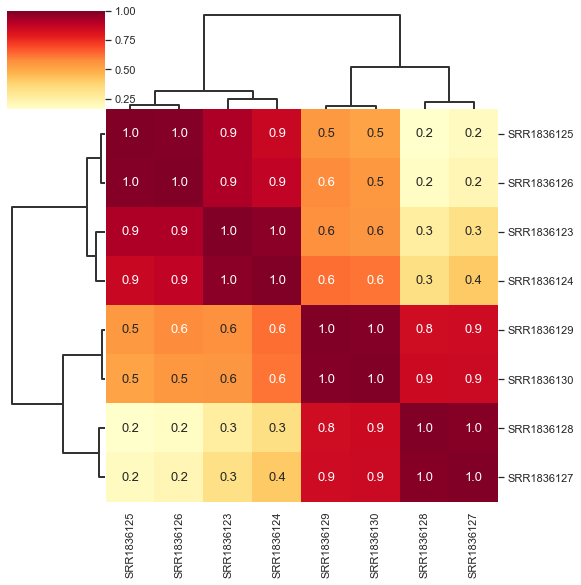

In [2]:
'''
    The function creates a correlation matrix to show the relationship between samples
    @param d:  The data object generated by data_loader.py
    @param type: "count"/"pileup" the matrix used for calculated correlation matrix. Count means read count
                 "pileup" means use the max depth of pileup to indicate abundance.
    @param groupby: group by can be "CODE_AA","AA","CODE" or "tRNA_Families" 
                    sum the value based on the column then calculate correlation.
    @param method: Method to calculate correlation (pearson, kendall, spearman)
    @param font_size: The size of text in matrix
    @return: None
'''
cp.drawCorrMatrixPic(d,
                     type="count", 
                     groupby="CODE_AA",
                     method="pearson",
                     font_size=13)

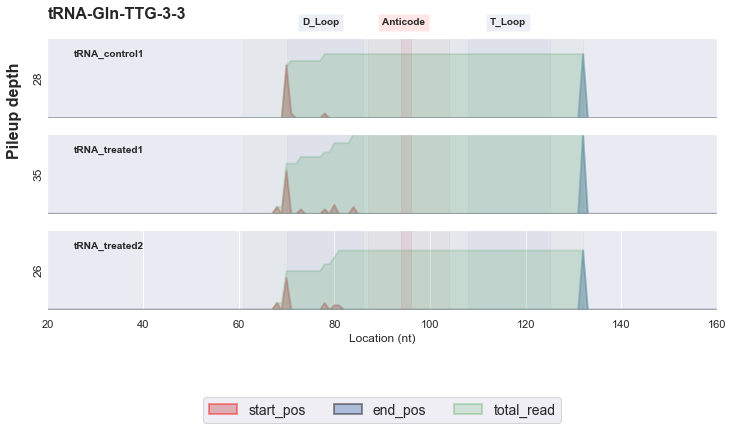

In [3]:
'''
    Draw tRF profiles for each tRNA across samples
    @param d: The data object generated by data_loader.py
    @param test: Boolean, If true only print the first profile for testing
                 or print all profiles in output_dir
    @param output_dir: The output directory. The default is <output_dir>/reports
    @param min_depth: The minimum depth of pileup for a sample to print the profile (Default 20)
    @param share_y_lim: Whether all profiles share the same depth limitation across samples (Default True)
    @param normalized: whether normalize to the number of total tRNA mapped reads (Default True)
    @return:
'''
dp.drawProfiles(d, 
                test = True,
                output_dir="",
                min_depth=20,
                share_y_lim = True,
                normalized = False
                )

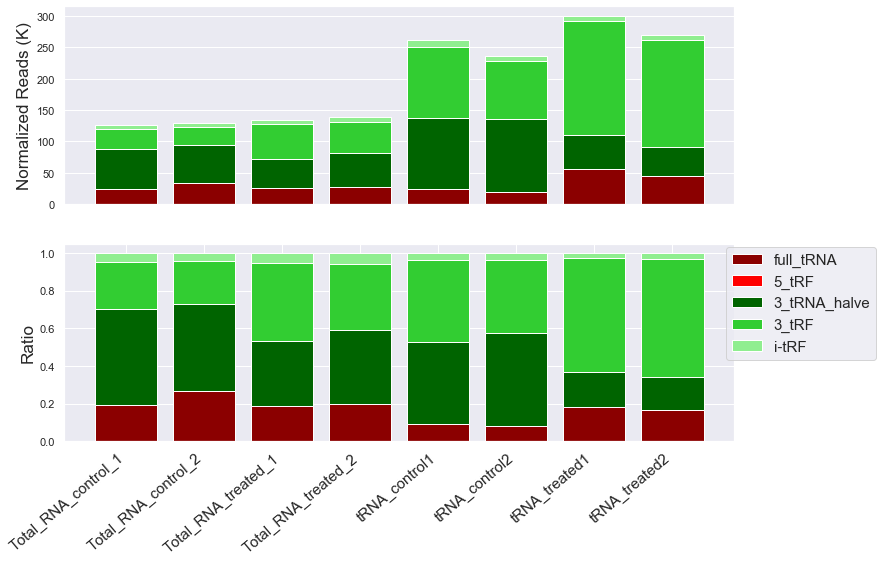

<Figure size 1080x1080 with 0 Axes>

In [4]:
'''
    Create two stack bar charts to show the components of tRFs in samples
    @param d: The data object generated by data_loader.py
    @param fontsize: The size of font of x, y axis and labels
    @return: None
'''
tt.drawTrfDistForSamples(d, 15)

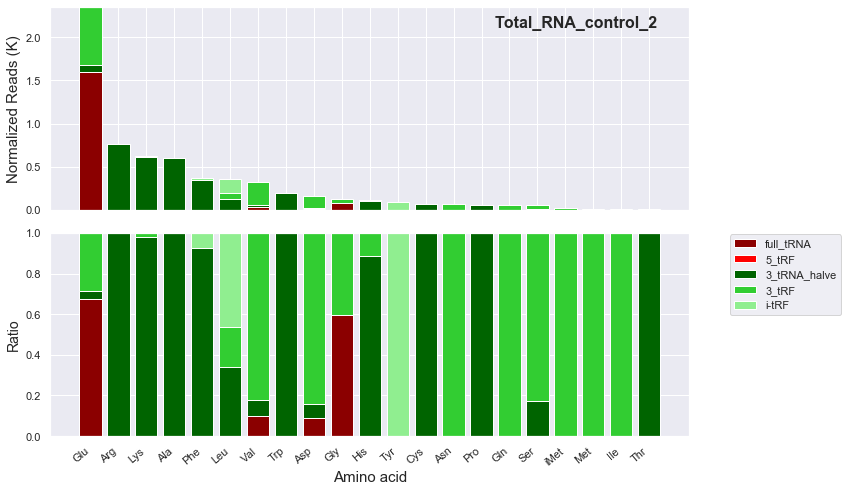

Finished


In [5]:
'''
    Create two stack bar charts to show the components of tRFs for each accepter in a samples
    @param d: The data object generated by data_loader.py
    @param test: Boolean, If true only print the stack bar charts for first sample for testing purposes
                 or print all profiles in output_dir with <report_dir> + "/" + s_id + '_aa.png'
    @return: None
'''
tt.drawTrfDistForAcceptersInSamples(d, test=True)

Selected Samples :SRR1836127,SRR1836126,SRR1836128,SRR1836129,SRR1836123
Available Samples :SRR1836128,SRR1836129,SRR1836123,SRR1836124,SRR1836125,SRR1836126,SRR1836130,SRR1836127


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/hqyone/PycharmProjects/tRNAExplorer/visualization/express_statistic_plot.py:198: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  group['len'], group['str_code'] = group['tRF_

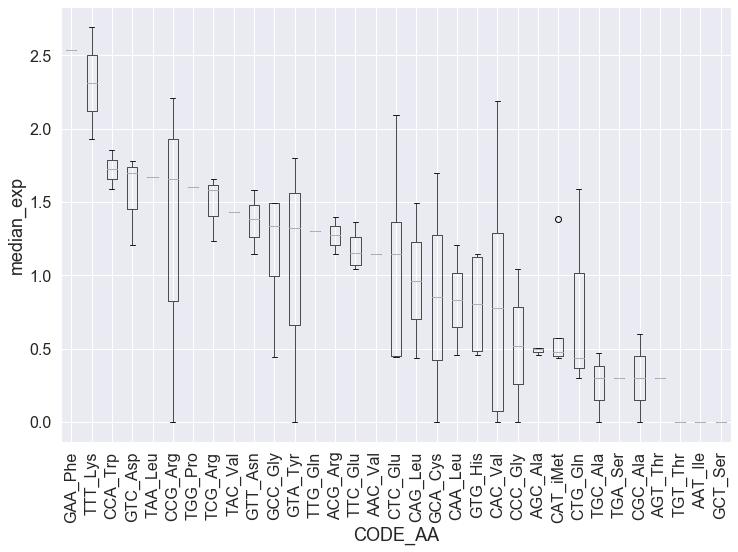

In [6]:
'''
    Create a box plot to compare expression level of tRF in multiple levels
    The program will calculate max_exp (max value of expression), exp_samples_num (The number of sample expressed the tRF)
    or median_exp (median expression across samples) and then group by some features (group by)
    to plot a box plot to compare expression between different groups
    @param d: The data object generated by data_loader.py
    @param min_exp_cutof: The minimum of read count for a sample to express the tRFs
    @param sample_ls: A list of IDs of selected sample, if it is empty, it will use all data from all available samples
    @param groupby: feature for group can be one of them ["tRF_First_Type","exp_samples","tRNA_families","CODE","CODE_AA","AA"]
    @param value: The way to calculate the expression ["]median_exp","exp_samples_num","max_exp"]
    @param fontsize: Font size (Default 14)
    @param fig_w: weight of figure (12)
    @param fig_h: height of figure (8)
    @return: None
'''
sample_ls=['SRR1836127','SRR1836126','SRR1836128','SRR1836129','SRR1836123']
# groupby can be "tRF_First_Type","CODE_AA","AA","CODE","tRNA_Family","CODE_AA"
es.drawExpBoxPlotForGroup(d,
                          min_exp_cutof=50,
                          sample_ls=sample_ls, 
                          groupby="CODE_AA",
                          value="median_exp",
                          fontsize = 16,
                          fig_w = 12,
                          fig_h = 8
                         )

Available Samples :SRR1836128,SRR1836129,SRR1836123,SRR1836124,SRR1836125,SRR1836126,SRR1836130,SRR1836127


/anaconda3/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:2019: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim([dvw, 0])


ValueError: The number of observations cannot be determined on an empty distance matrix.

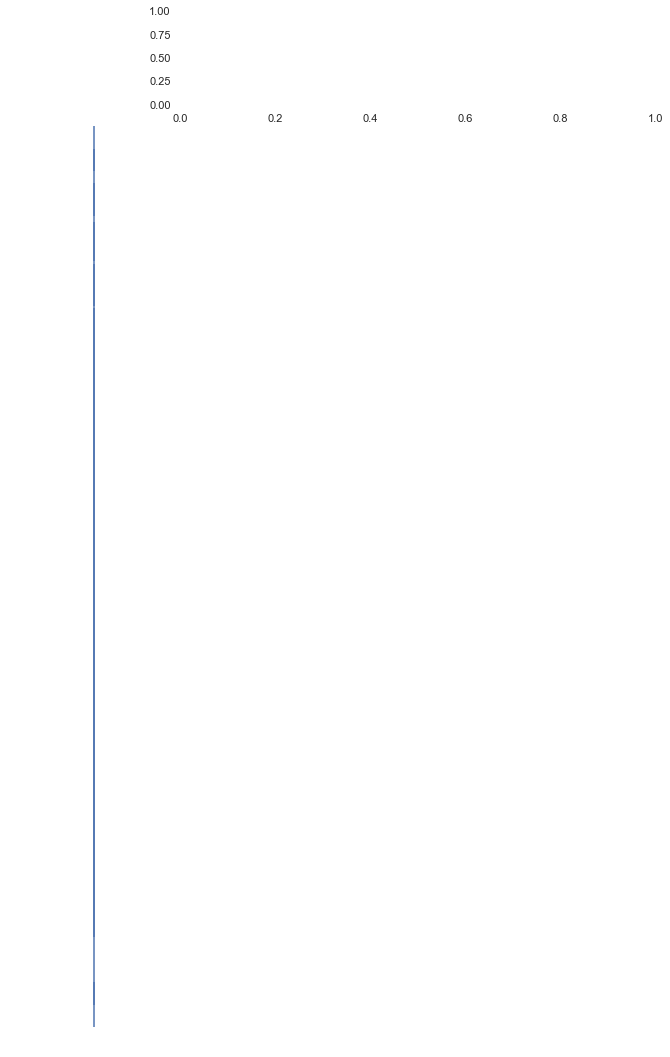

In [7]:
'''
    Create expression matrix of
    @param d: The data object generated by data_loader.py
    @param figure: Absolute path of output figure, Default : report_dir+"/exp_matrix.png"
    @param sample_ls: selected sample ID list, if it is empty, it will use all data from all available samples
    @param groupby: "tRF_First_Type","CODE_AA","AA","CODE","tRNA_Families","CODE_AA","tRNA_ID"
    @param fontsize: Font size (Default 14)
    @param fig_w: weight of figure (12)
    @param fig_h: height of figure (18)
    @return: None
'''
# sample_ls=['SRR1836127','SRR1836126','SRR1836128','SRR1836129','SRR1836123']
sample_ls=[]
es.drawExpMatrixForFamily(d,
                          figure = "matrix.png",
                          sample_ls = sample_ls,
                          groupby='AA',
                          fontsize = 14,
                          fig_w = 12,
                          fig_h = 18
                          )

